# Part 2 - Data Ingestion + Transformation into Iguazio's Feature Store

### Initialize MLRun Project

In [1]:
# MLRun imports
import mlrun.feature_store as fstore
from mlrun.feature_store.steps import MapValues, OneHotEncoder
from mlrun.datastore.sources import CSVSource
from mlrun.datastore.targets import ParquetTarget
from mlrun import get_or_create_project

# Create MLRun project
project = get_or_create_project(name="azure-fs-demo", context="./")

> 2022-02-18 01:06:09,523 [info] loaded project azure-fs-demo from MLRun DB


### Ingest Target FeatureSet

In [2]:
# Create feature set with name and entity (primary key)
heart_disease_target = fstore.FeatureSet(name="heart_disease_target",
                                         entities=[fstore.Entity("patient_id")])

# Set default parquet/KV targets
heart_disease_target.set_targets()

In [3]:
# CSV source - customizable
source = CSVSource("mycsv", path="target.csv")

# Ingest into feature store - returns transformed dataframe
resp = fstore.ingest(featureset=heart_disease_target, source=source)

# Print top 5 rows of newly ingested data
resp.head()

,target
patient_id,
e443544b-8d9e-4f6c-9623-e24b6139aae0,0
8227d3df-16ab-4452-8ea5-99472362d982,0
10c4b4ba-ab40-44de-8aba-6bdb062192c4,0
f0acdc22-7ee6-4817-a671-e136211bc0a6,0
2d6b3bca-4841-4618-9a8c-ca902010b009,0


### Ingest Features FeatureSet

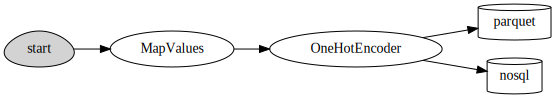

In [4]:
# Create feature set with name and entity (primary key)
heart_disease_features = fstore.FeatureSet(name="heart_disease_features",
                                           entities=[fstore.Entity("patient_id")])

# Set default parquet/KV targets
heart_disease_features.set_targets()

# Transformation mapping - specific to MapValues component
age_mapping = {'age': {'ranges': [{'range': [0, 3], "value": "toddler"},
                                  {'range': [3, 18], "value": "child"},
                                  {'range': [18, 65], "value": "adult"},
                                  {'range': [65, 120], "value": "elder"}]}}

# Transformation mapping - specific to OneHotEncoder component
one_hot_encoder_mapping = {'age_mapped': ['toddler', 'child', 'adult', 'elder'],
                           'sex': ['male', 'female'],
                           'cp': ['typical_angina', 'atypical_angina', 'non_anginal_pain', 'asymtomatic'],
                           'exang': ['no', 'yes'],
                           'fbs': [False, True],
                           'slope': ['downsloping', 'upsloping', 'flat'],
                           'thal': ['normal', 'reversable_defect', 'fixed_defect']}

# Add Python classes to transformation graph (with configuration)
heart_disease_features.graph.to(MapValues(mapping=age_mapping, with_original_features=True))\
                            .to(OneHotEncoder(mapping=one_hot_encoder_mapping))

# Print out transformation graph
heart_disease_features.plot(rankdir='LR', with_targets=True)

In [5]:
# CSV source - customizable
source = CSVSource("mycsv", path="features.csv")

# Ingest into feature store - returns transformed dataframe
resp = fstore.ingest(featureset=heart_disease_features, source=source)

# Print top 5 rows of newly ingested data
resp.head()

,age_mapped_toddler,age_mapped_child,age_mapped_adult,age_mapped_elder,age,sex_male,sex_female,cp_typical_angina,cp_atypical_angina,cp_non_anginal_pain,...,exang_no,exang_yes,oldpeak,slope_downsloping,slope_upsloping,slope_flat,ca,thal_normal,thal_reversable_defect,thal_fixed_defect
patient_id,,,,,,,,,,,,,,,,,,,,,
e443544b-8d9e-4f6c-9623-e24b6139aae0,0,0,1,0,52,1,0,1,0,0,...,1,0,1.0,1,0,0,2.0,1,0,0
8227d3df-16ab-4452-8ea5-99472362d982,0,0,1,0,53,1,0,1,0,0,...,0,1,3.1,0,1,0,0.0,1,0,0
10c4b4ba-ab40-44de-8aba-6bdb062192c4,0,0,0,1,70,1,0,1,0,0,...,0,1,2.6,0,1,0,0.0,1,0,0
f0acdc22-7ee6-4817-a671-e136211bc0a6,0,0,1,0,61,1,0,1,0,0,...,1,0,0.0,1,0,0,1.0,1,0,0
2d6b3bca-4841-4618-9a8c-ca902010b009,0,0,1,0,62,0,1,1,0,0,...,1,0,1.9,0,0,1,3.0,0,1,0


### Create FeatureVector

In [6]:
# Create feature vector with list of features + desired label
# Specify in format of FEATURE_SET.FEATURE (or * for all)
vector = fstore.FeatureVector(
    name="heart_disease_vec",
    features=["heart_disease_features.*"],
    label_feature="heart_disease_target.target"
)
vector.save()

### Retrieve Offline Features

In [7]:
# Retrieve feature vector as pandas dataframe
# Specify in format of PROJECT/FEATURE_VECTOR
fstore.get_offline_features("azure-fs-demo/heart_disease_vec").to_dataframe().head()

,age_mapped_toddler,age_mapped_child,age_mapped_adult,age_mapped_elder,age,sex_male,sex_female,cp_typical_angina,cp_atypical_angina,cp_non_anginal_pain,...,exang_yes,oldpeak,slope_downsloping,slope_upsloping,slope_flat,ca,thal_normal,thal_reversable_defect,thal_fixed_defect,target
0,0,0,1,0,52,1,0,1,0,0,...,0,1.0,1,0,0,2.0,1,0,0,0
1,0,0,1,0,53,1,0,1,0,0,...,1,3.1,0,1,0,0.0,1,0,0,0
2,0,0,0,1,70,1,0,1,0,0,...,1,2.6,0,1,0,0.0,1,0,0,0
3,0,0,1,0,61,1,0,1,0,0,...,0,0.0,1,0,0,1.0,1,0,0,0
4,0,0,1,0,62,0,1,1,0,0,...,0,1.9,0,0,1,3.0,0,1,0,0


In [8]:
fstore.get_offline_features("azure-fs-demo/heart_disease_vec", target=ParquetTarget())

> 2022-02-18 01:06:38,925 [info] wrote target: {'name': 'parquet', 'kind': 'parquet', 'path': 'v3io:///projects/azure-fs-demo/FeatureStore/heart_disease_vec/parquet/vectors/heart_disease_vec-latest.parquet', 'status': 'ready', 'updated': '2022-02-18T01:06:38.925482+00:00', 'size': 66289}


### Retrieve Online Features

In [9]:
# Retrieve online feature service
# Specify in format of PROJECT/FEATURE_VECTOR
feature_service = fstore.get_online_feature_service("azure-fs-demo/heart_disease_vec")

In [11]:
# Retrieve record via entity (primary key)
feature_service.get([{"patient_id" : "e443544b-8d9e-4f6c-9623-e24b6139aae0"}])

[{'age_mapped_toddler': 0,
  'age_mapped_child': 0,
  'age_mapped_adult': 1,
  'age_mapped_elder': 0,
  'age': 52,
  'sex_male': 1,
  'sex_female': 0,
  'cp_typical_angina': 1,
  'cp_atypical_angina': 0,
  'cp_non_anginal_pain': 0,
  'cp_asymtomatic': 0,
  'trestbps': 125,
  'chol': 212,
  'fbs_False': 1,
  'fbs_True': 0,
  'restecg': 1,
  'thalach': 168,
  'exang_no': 1,
  'exang_yes': 0,
  'oldpeak': 1.0,
  'slope_downsloping': 1,
  'slope_upsloping': 0,
  'slope_flat': 0,
  'ca': 2.0,
  'thal_normal': 1,
  'thal_reversable_defect': 0,
  'thal_fixed_defect': 0}]